In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.duplicated().sum()

1

In [12]:
df=df.drop_duplicates()

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


<Axes: >

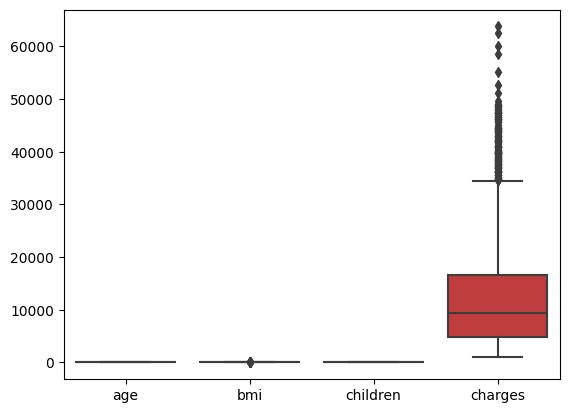

In [15]:
sns.boxplot(df)

In [17]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['sex']= label_encoder.fit_transform(df['sex'])
df['sex'].unique()
df['smoker']= label_encoder.fit_transform(df['smoker'])
df['region']= label_encoder.fit_transform(df['region'])

<Axes: xlabel='charges', ylabel='count'>

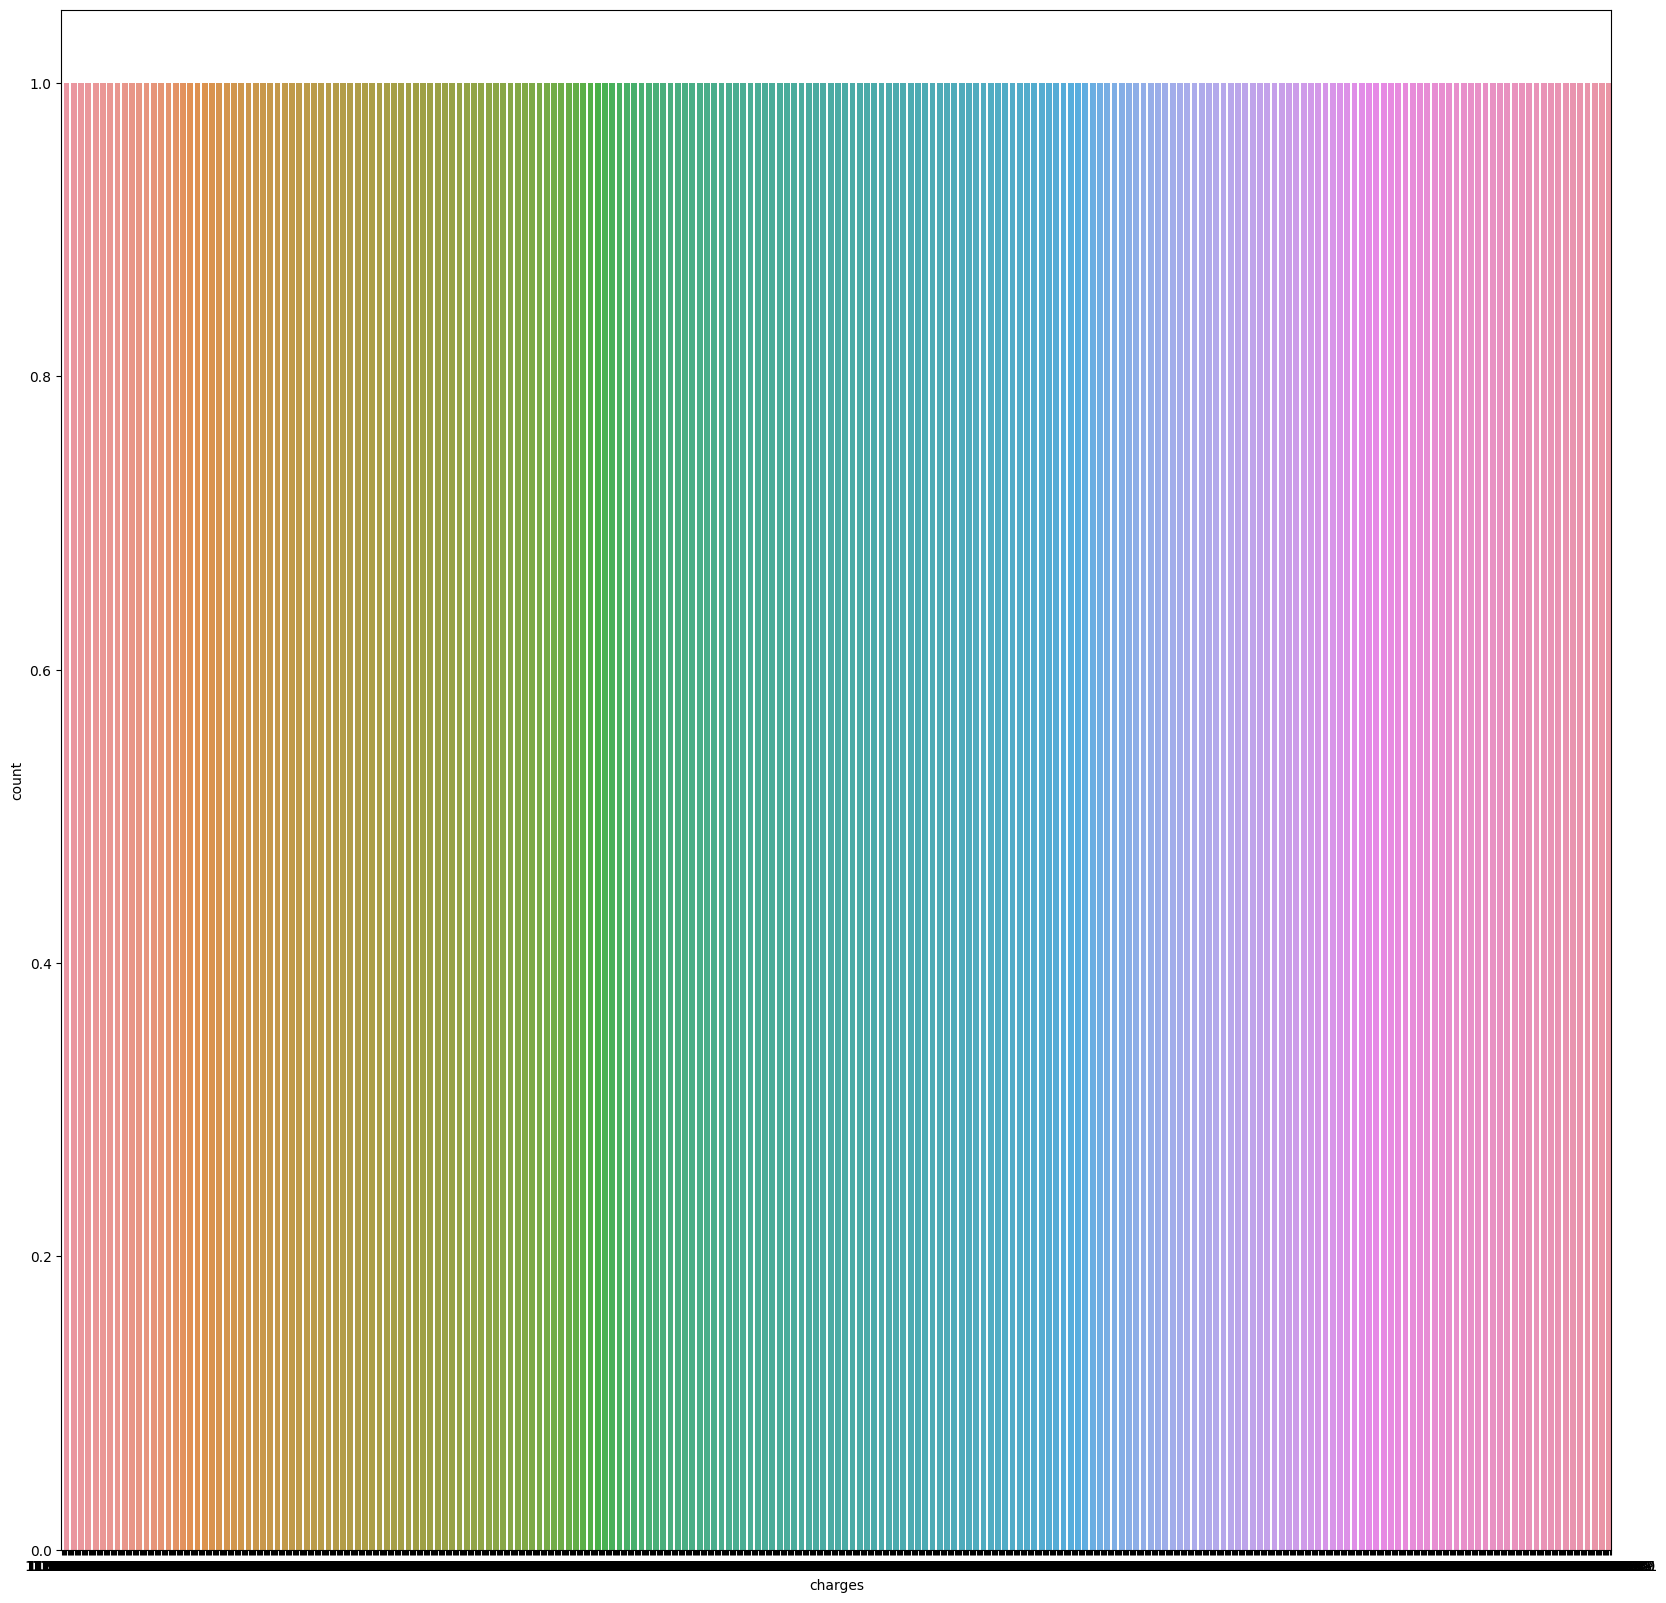

In [20]:
plt.figure(figsize=(20,20))
sns.histplot(x='charges',hue='sex',data=df)

<Axes: xlabel='bmi', ylabel='charges'>

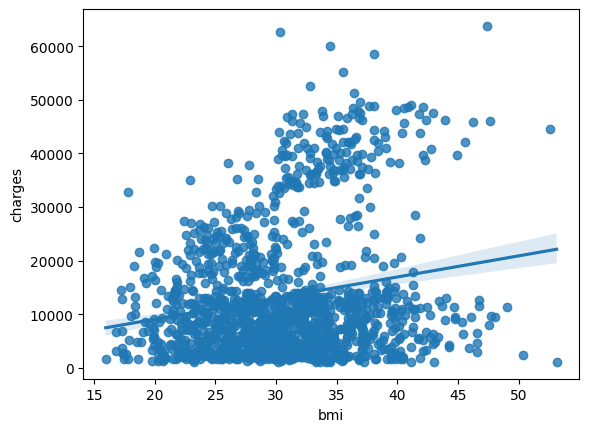

In [21]:
sns.regplot(y='charges',x='bmi',data=df)

<Axes: xlabel='age', ylabel='charges'>

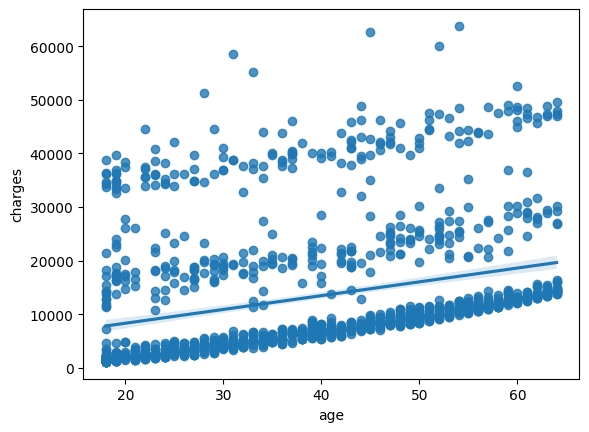

In [30]:
sns.regplot(x='age',y='charges',data=df)

<Axes: xlabel='sex', ylabel='charges'>

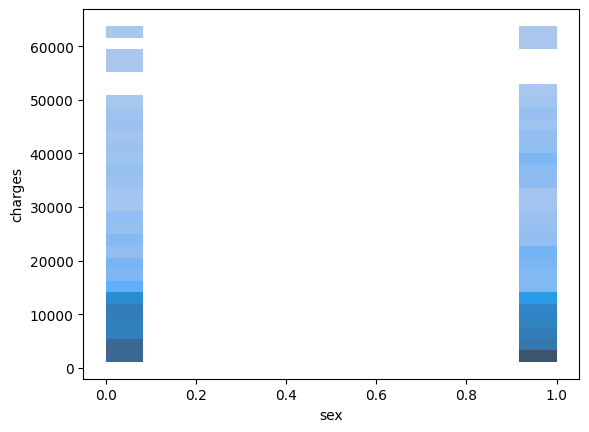

In [31]:
sns.histplot(x='sex',y='charges',data=df)

<Axes: xlabel='children', ylabel='charges'>

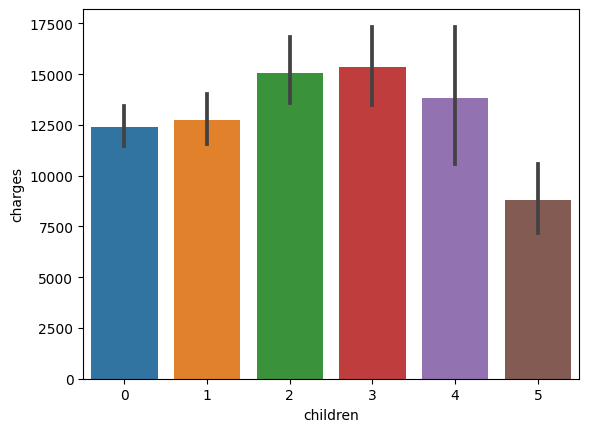

In [33]:
sns.barplot(x='children',y='charges',data=df)

<Axes: xlabel='charges', ylabel='Count'>

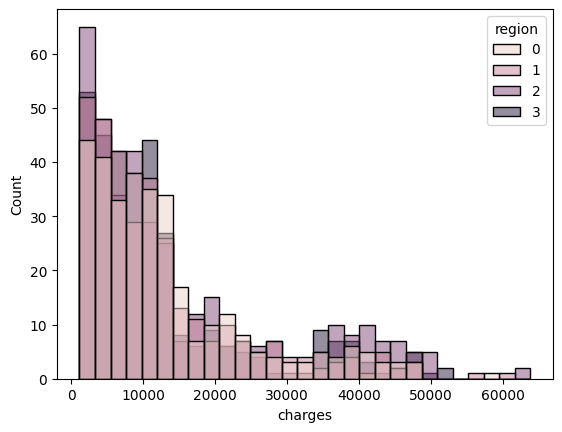

In [38]:
sns.histplot(x='charges',hue='region',data=df)

Splitting features and target

In [39]:
X=df.drop(columns='charges',axis=1)

In [40]:
Y=df['charges']

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [42]:
regressor = LinearRegression()

In [43]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [45]:
training_data_prediction =regressor.predict(X_train)
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale for train: ', r2_train)
test_data_prediction =regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale for test: ', r2_test)

R squared vale for train:  0.7586223702914746
R squared vale for test:  0.7164204424900908


Predicative System

In [46]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[28170.33720569]
The insurance cost is USD  28170.337205691576


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
